<a href="https://colab.research.google.com/github/ambideXtrous9/Machine-Learning-Assignments/blob/main/214161006_214161011_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 527 Machine Learning Lab
# Assignment 05
-----------------------------------------
214161006 Pathak Sanchit Vivekanand

214161011 Sushovan Saha

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.special import comb
import math
from matplotlib.offsetbox import AnchoredText

# Q1. Consider the objective function f(x, y) given by:

$z = 1.7*exp[-\{\frac{(x-3)^{2}}{10} + \frac{(y-3)^{2}}{10}\}] + $
$exp[-\{\frac{(x+5)^{2}}{8} + \frac{(y+5)^{2}}{8}\}] + 2*exp[-\{\frac{x^{2}}{4} + \frac{y^{2}}{5}\}] +$
$1.5*exp[-\{\frac{(x-4)^{2}}{18} + \frac{(y+4)^{2}}{16}\}] + 1.2*exp[-\{\frac{(x+4)^{2}}{18} + \frac{(y-4)^{2}}{18}\}]$

Find the maxima $z^{⋆} = f(x^{⋆}, y^{⋆})$ using Gradient Ascent. Experiment with multiple initial values $(x^{(0)}, y^{(0)}) \epsilon $[−10, 10] × [−10, 10] and different number of iterations. Visualize the contour plot of f(x, y) and show the trajectories of the gradient ascent solution iterations.
Report the best solutions $x^{⋆}, y^{⋆}, z^{⋆}$.

In [ ]:
#define the equation of given multi-modal function
def mini_eqn(x,y,a,b,c,d):
  '''This function returns the exp{-(((x-a)**2)/c + ((y-b)**2)/d)} sub-part of the given equation of z.
  This is done for code-readability'''
  temp1 = ((x-a)**2)/c
  temp2 = ((y-b)**2)/d
  temp = temp1+temp2
  return np.exp(-temp)

def full_eqn(x1,y1):
  return (1.7*mini_eqn(x1,y1,3,3,10,10) + mini_eqn(x1,y1,-5,-5,8,8) + 2*mini_eqn(x1,y1,0,0,4,5)
  + 1.5*mini_eqn(x1,y1,4,-4,18,16) + 1.2*mini_eqn(x1,y1,-4,4,18,16))

def derivative(xy):
  x = xy[0]
  y = xy[1]
  dx = (-1.7*mini_eqn(x,y,3,3,10,10)*(x-3)/5) - (mini_eqn(x,y,-5,-5,8,8)*(x+5)/4) - mini_eqn(x,y,0,0,4,5)*x - (1.5*mini_eqn(x,y,4,-4,18,16)*(x-4)/9) - (1.2*mini_eqn(x,y,-4,4,18,16)*(x+4)/9)
  dy = (-1.7*mini_eqn(x,y,3,3,10,10)*(y-3)/5) - (mini_eqn(x,y,-5,-5,8,8)*(y+5)/4) - (4*mini_eqn(x,y,0,0,4,5)*y/5) - (1.5*mini_eqn(x,y,4,-4,18,16)*(y+4)/8) - (1.2*mini_eqn(x,y,-4,4,18,16)*(y-4)/8)
  return np.array([dx,dy])

def solve(x0,y0,eta=1,iter=10):
    X = []
    Y = []

    xy = np.array([x0,y0])
    
    for i in range(iter):
      grad = derivative(xy)
      X.append(xy[0])
      Y.append(xy[1])
      xy = xy + eta*grad
        
    return xy, X, Y

def plot_my_contour(aa,bb,z):
  plt.figure(figsize=(7,7))
  plt.contour(aa,bb,z)
  plt.title("Contour Plot (x0,y0,iter)")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid(True)
  plt.xticks(ticks=range(-10,10,1))
  plt.yticks(ticks=range(-10,10,1))

def plot_my_trajectory(X,Y,x0,y0,iter):
  plt.scatter(X,Y)
  plt.plot(X,Y, label="("+str(x0)+", "+str(y0)+", "+str(iter)+")")
  plt.legend(loc='upper left')

def find_best(X,Y, best):
  curr_z = full_eqn(X[-1],Y[-1])
  if curr_z>=best[2]:
    best = np.array([X[-1], Y[-1], curr_z])
  return best


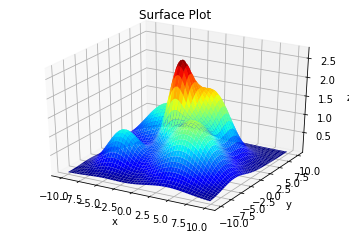

In [ ]:
#set min & max of x & y as per question
xmin = -10
xmax = 10
ymin = -10
ymax = 10

#set the x-axis & y-axis
x = np.arange(xmin,xmax,0.1)
y = np.arange(ymin,ymax,0.1)

#generate a meshgrid
xx,yy = np.meshgrid(x,y)

#plot the surface plot of z
plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(xx,yy,full_eqn(xx,yy), cmap="jet")
ax.set_title("Surface Plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

x = 0.21147006807564195, y = 0.2144498671557192
x = -4.929440611115943, y = -4.95757168719833
x = -3.804824457796783, y = 3.9487028583992574
x = 3.956513499683852, y = -3.879586525167263
x = 0.21147006807564195, y = 0.2144498671557192


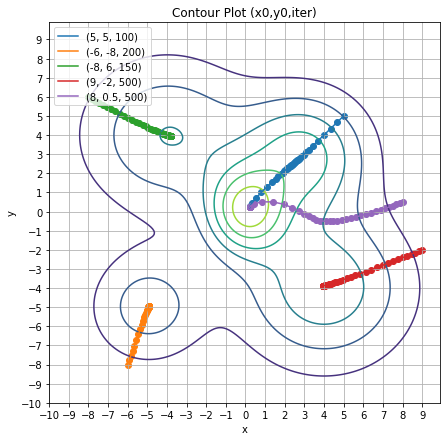


Best solution (x*,y*,z*): ( 0.21147006807564195 , 0.2144498671557192 , 2.7259351464671253 )


In [ ]:
#initialize best solution (x*,y*,z*)
best = np.array([0,0,float('-inf')])

#first plot the contour as background to our trajectories
plot_my_contour(xx,yy,full_eqn(xx,yy))

#----do gradient descent for various values of (x0,y0,iter)----

#----------------------------------------------------------------
#set (x0,y0,iter)
x0 = 5
y0 = 5
ITER = 100
#run gradient descent
soln, X, Y = solve(x0,y0,iter=ITER)
best = find_best(X,Y,best)

print("x = ", soln[0], ", y = ", soln[1], sep='')
#plot the trajectory
plot_my_trajectory(X,Y,x0,y0,ITER)

#----------------------------------------------------------------

#set (x0,y0,iter)
x0 = -6
y0 = -8
ITER = 200
#run gradient descent
soln, X, Y = solve(x0,y0,iter=ITER)
best = find_best(X,Y,best)

print("x = ", soln[0], ", y = ", soln[1], sep='')
#plot the trajectory
plot_my_trajectory(X,Y,x0,y0,ITER)

#----------------------------------------------------------------

#set (x0,y0,iter)
x0 = -8
y0 = 6
ITER = 150
#run gradient descent
soln, X, Y = solve(x0,y0,iter=ITER)
best = find_best(X,Y,best)

print("x = ", soln[0], ", y = ", soln[1], sep='')
#plot the trajectory
plot_my_trajectory(X,Y,x0,y0,ITER)

#----------------------------------------------------------------

#set (x0,y0,iter)
x0 = 9
y0 = -2
ITER = 500
#run gradient descent
soln, X, Y = solve(x0,y0,iter=ITER)
best = find_best(X,Y,best)

print("x = ", soln[0], ", y = ", soln[1], sep='')
#plot the trajectory
plot_my_trajectory(X,Y,x0,y0,ITER)

#----------------------------------------------------------------

#set (x0,y0,iter)
x0 = 8
y0 = 0.5
ITER = 500
#run gradient descent
soln, X, Y = solve(x0,y0,iter=ITER)
best = find_best(X,Y,best)

print("x = ", soln[0], ", y = ", soln[1], sep='')
#plot the trajectory
plot_my_trajectory(X,Y,x0,y0,ITER)

#----------------------------------------------------------------

#finally hold off plot
plt.show()

#best solution of x*, y*, z*
print("\nBest solution (x*,y*,z*): (", best[0], ",", best[1], ",", best[2], ")")

# Q2. 
Find the maxima $z^{*} = f(x^{*}, y^{*})$ using Stochastic Search. The solution search space is given
by the search space bounds $X_{min} = [x_{min}, y_{min}]$
$T = [−10, −10]^{T}$
and $X_{max} = [x_{max}, y_{max}]$
$T = [10, 10]^{T}$
. Write the following function in Python.


$[bestX, bestY, maxF] = stochasticSearch(X_{min}, X_{max}, popSize, nbhSize, maxItr)$


Here, $z^{*} = maxF = f(bestX = x^{*}, bestY = y^{*})$ is the best solution found by $StochasticSearch$ with a Solution Population Size of $popSize$ and $maxItr$ Iterations (or Generations). During pure exploitation, the children solutions of a parent px are generated in a hypersphere of radius $nbhSize$ centered at $px$. Display the scatter plot of the solutions in each
iteration on the contour plot of $f(x, y)$ to visualize the trajectories of the solutions in the
population. Experiment with different values of popSize, nbhSize and maxItr and report the best solution.

In [ ]:
def stochasticSearch(Xmin, Xmax, popSize, nbhSize, maxIter):
  m = popSize
  n = len(Xmin)

  #initialize population S0 in search space (Xmin, Xmax)
  alpha_ij = np.random.uniform(0, 1, size=(m,n))
  S = (1-alpha_ij)*Xmin + alpha_ij*Xmax

  #evaluate Y0 for solution population S0
  Y = full_eqn(S[:,0], S[:,1])

  BX = []
  BY = []

  PLOTS_PER_ROW = 2
  a,b=0,0
  s = "popSize = {}, nbhSize = {}, maxIter = {}".format(popSize, nbhSize, maxIter)
  k=maxIter
  fig, axs = plt.subplots(math.ceil(k/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(15, 15))
  fig.suptitle(s,fontsize=20)


  #loop till maxIter
  for i in range(maxIter):
    #---generate non-negative set Ut from Yt---
    U = Y - np.min(Y)

    #---evaluate Pt by sum normalizing Ut---
    P = U/np.sum(U)

    #---generate children population by random walk S_rw for each point in St---
    S_rw = np.empty((0,n))
    for j in range(m):
      #get cardinality
      Ci = np.round(m*P[j]).astype(int)
      if Ci==0:
        continue
      #generate unit vector & radius of n-D hypersphere
      vi = np.random.uniform(-1,1,size=(Ci,n))
      vi = vi/np.linalg.norm(vi, axis=1).reshape(-1,1)
      lmbda = np.random.uniform(0,nbhSize,size=(Ci,1))
      #generate children
      xi = S[j] + lmbda*vi
      S_rw = np.row_stack((S_rw,xi))

    #---generate children population by random linear combination S_rlc for each point pair in St---
    alpha_k = np.random.uniform(0,1,size=(comb(m,2).astype(int),1))
    #generate mC2 unique pairs of points
    q,w = np.triu_indices(m,k=1)
    #generate children
    S_rlc = (1-alpha_k)*S[q,:] + alpha_k*S[w,:]

    #---generate children population by random re-initialization S_rri---
    alpha_rri = np.random.uniform(0, 1, size=(m,n))
    S_rri = (1-alpha_rri)*Xmin + alpha_rri*Xmax

    #---evaluate Y_rw, Y_rlc, Y_rri---
    Y_rw = full_eqn(S_rw[:,0], S_rw[:,1])
    Y_rlc = full_eqn(S_rlc[:,0], S_rlc[:,1])
    Y_rri = full_eqn(S_rri[:,0], S_rri[:,1])

    #---plot scatter in each iteration---
    s = "ITER =  {}".format(i+1)
    axs[a][b].contour(xx,yy,full_eqn(xx,yy))
    axs[a][b].scatter(S[:,0], S[:,1], label='Sol. set')
    axs[a][b].scatter(S_rw[:,0], S_rw[:,1], label='S_rw')
    axs[a][b].scatter(S_rlc[:,0], S_rlc[:,1], label='S_rlc')
    axs[a][b].scatter(S_rri[:,0], S_rri[:,1], label='S_rri')
    axs[a][b].set_xlim([Xmin[0],Xmax[0]])
    axs[a][b].set_ylim([Xmin[1],Xmax[1]])
    axs[a][b].add_artist(AnchoredText(s, loc=4))

    #---generate Best solution set {St+1,Yt+1}
    S_union = np.unique(np.concatenate([S,S_rw,S_rlc,S_rri]),axis=0)
    Y_union = full_eqn(S_union[:,0], S_union[:,1])

    idx = np.argpartition(Y_union,-m)[-m:]
    S = S_union[idx]
    Y = Y_union[idx]

    bIdx = np.argmax(Y)
    bX = S[bIdx,0]
    bY = S[bIdx,1]
    BX.append(bX)
    BY.append(bY)

    axs[a][b].plot(BX,BY,label='trajectory',color='magenta')
    axs[a][b].legend(loc='best')
    
    b+=1
    if b%PLOTS_PER_ROW==0:
        a+=1
        b=0
    
  plt.show()
  #return bestX, bestY, maxF
  bestIdx = np.argmax(Y)
  bestX = S[bestIdx,0]
  bestY = S[bestIdx,1]
  maxF = np.max(Y)

  return bestX, bestY, maxF

$ popSize = 20, nbhSize = 2.53, maxIter = 6$

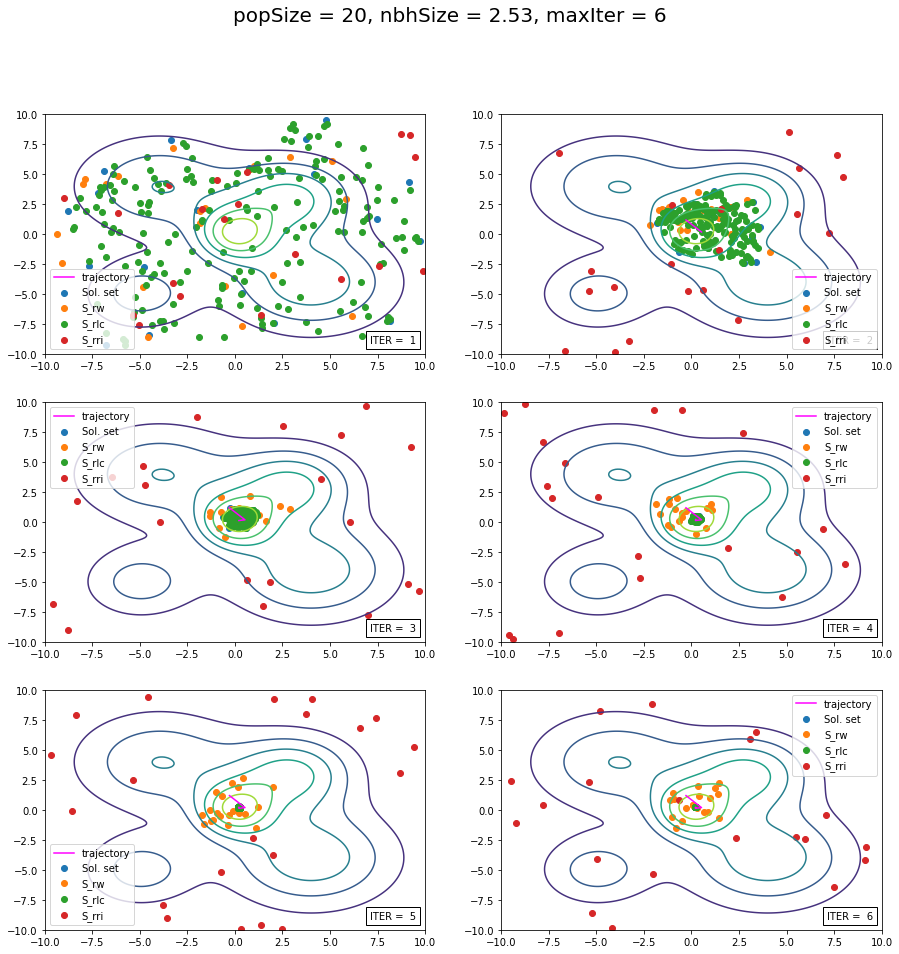


Best solution (x*,y*,z*): ( 0.2117283091374154 , 0.214663745570005 , 2.725935103891524 )


In [ ]:
Xmin = np.array([-10,-10])
Xmax = np.array([10,10])
popSize = 20
nbhSize = 2.53
maxIter = 6
bestX, bestY, maxF = stochasticSearch(Xmin, Xmax, popSize, nbhSize, maxIter)
#best solution of x*, y*, z*
print("\nBest solution (x*,y*,z*): (", bestX, ",", bestY, ",", maxF, ")")

$ popSize = 30, nbhSize = 3, maxIter = 8$

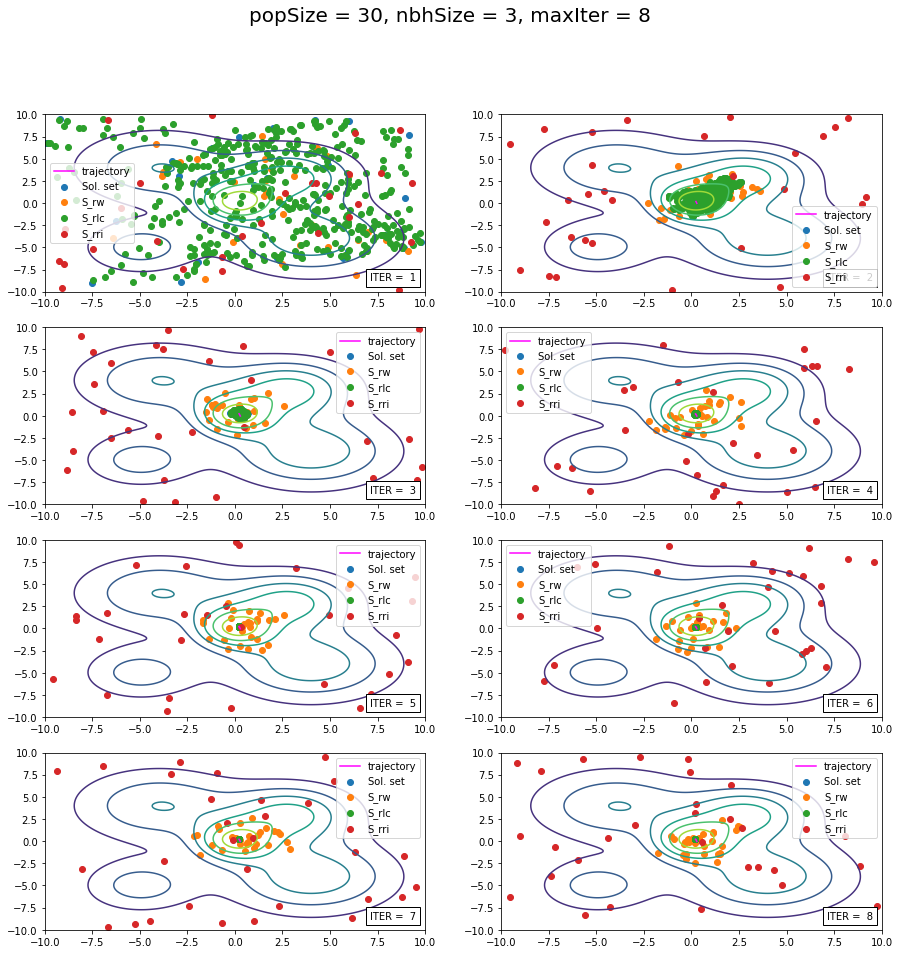


Best solution (x*,y*,z*): ( 0.2114715326977859 , 0.21444788006398463 , 2.7259351464647237 )


In [ ]:
Xmin = np.array([-10,-10])
Xmax = np.array([10,10])
popSize = 30
nbhSize = 3
maxIter = 8
bestX, bestY, maxF = stochasticSearch(Xmin, Xmax, popSize, nbhSize, maxIter)
#best solution of x*, y*, z*
print("\nBest solution (x*,y*,z*): (", bestX, ",", bestY, ",", maxF, ")")

$ popSize = 30, nbhSize = 1.5, maxIter = 4$

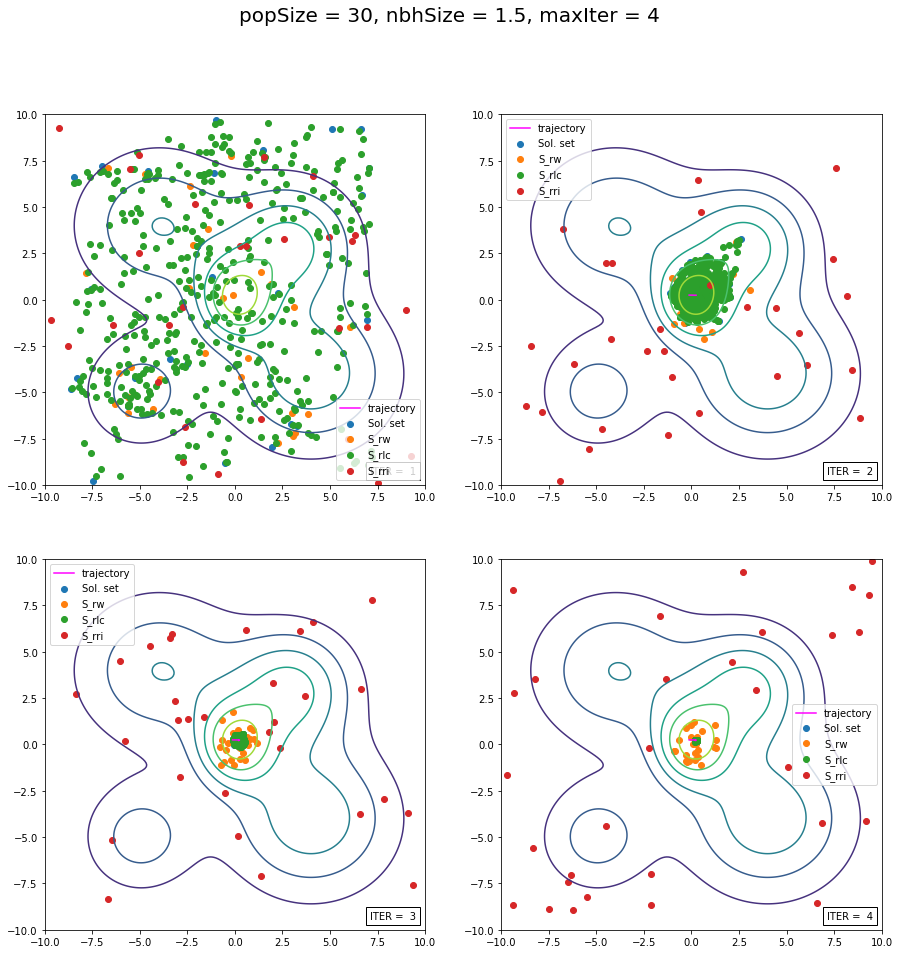


Best solution (x*,y*,z*): ( 0.21117103198686193 , 0.2159370952320137 , 2.7259343409330192 )


In [ ]:
Xmin = np.array([-10,-10])
Xmax = np.array([10,10])
popSize = 30
nbhSize = 1.5
maxIter = 4
bestX, bestY, maxF = stochasticSearch(Xmin, Xmax, popSize, nbhSize, maxIter)
#best solution of x*, y*, z*
print("\nBest solution (x*,y*,z*): (", bestX, ",", bestY, ",", maxF, ")")